In [ ]:
# Se instalan los paquetes necesarios para el análisis de sentimiento
!pip install --upgrade numpy gensim
!pip install pandas --upgrade
!pip install matplotlib --upgrade
!pip install emoji --upgrade
!pip install nltk

In [ ]:
# Se importan las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import emoji
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from gensim.models import LdaModel
from gensim.corpora import Dictionary

# Se descarga el léxico de VADER
nltk.download('vader_lexicon')

In [ ]:
# 4. Análisis de Sentimiento

#La limpieza en el apartado de análisis de sentimientos se realiza de forma ligeramente diferente, sin eliminar stopwords, puntuación y mayúsculas ya que son relevantes para este análisis.
#Por ello cargamos un nuevo csv realizado en R en el que se mantienen los elementos mencionados anteriormente.

#Se lee el nuevo "conjunto de datos" con la nueva limpieza hecha y se eliminan los datos duplicados
df_sentiment = pd.read_csv('/content/df_reddit_comentarios_en_limpios.csv',sep=';')
df_sentiment

,Título,Fecha,Subreddit,Autor,date,year,month,day,language,texto_length,cleaned_text
0,I see many posts here saying that people want ...,2025-02-19 11:33:02,TheHandmaidsTale,Poch1212,2025-02-19,2025,2,19,en,2003,worked while ago hospital aiding refugees/ille...
1,Collapse Comes Early for Canada: Prepare for U...,2025-02-19 04:57:29,CollapsePrep,verdasuno,2025-02-19,2025,2,19,en,3265,"Long time lurker here, feeling compelled now p..."
2,Predictions and Prophecies,2025-02-19 01:04:18,prophets,RosalieJewel,2025-02-19,2025,2,19,en,6415,"March , - Cataclysmic Shift and Future predict..."
3,"March 4, 2025 - Cataclysmic Shift and Future p...",2025-02-19 00:50:20,anonspropheticdream,RosalieJewel,2025-02-19,2025,2,19,en,6357,honestly not like the word prophet because the...
4,"February 18, 2025, 4:17 pm | Nicaragua (NI) - ...",2025-02-18 16:17:56,ABCWorldNews,AcademicAd8273,2025-02-18,2025,2,18,en,4460,___ . #### Nicaraguan Ambassador Carlos Eduard...
...,...,...,...,...,...,...,...,...,...,...,...
13082,Do Uncommitted/Jill Stein voters not realize t...,2024-09-14 20:58:21,millenials,zipzzo,2024-09-14,2024,9,14,en,4668,Can somebody explain the thought process here?...
13083,"He's a proven rapist, serial liar, and busines...",2024-09-14 12:55:30,PoliticsVermont,RamaSchneider,2024-09-14,2024,9,14,en,1179,>Donald Trump repeated racist claims about Hai...
13084,Trump vows mass deportations from town rocked ...,2024-09-13 23:24:26,autotldr,autotldr,2024-09-13,2024,9,13,en,2632,"This the best ; could make, [original]( reduce..."
13085,Best longform profiles of the week,2024-09-13 22:46:32,longform,VegetableHousing139,2024-09-13,2024,9,13,en,17890,"Hey guys, ' back with some the best longform p..."


In [ ]:
#También se procede a leer el csv previamente guardado en el modelado de tópicos con los resultados del del mismo
df_topics=pd.read_csv('topic_model_results.csv', sep=',',index_col=False)
df_topics

,Unnamed: 0,Título,Fecha,Subreddit,Autor,date,year,month,day,language,texto_length,cleaned_text,lemmas,tokens,lda_features,topic_dominant
0,0,I see many posts here saying that people want ...,2025-02-19 11:33:02,TheHandmaidsTale,Poch1212,2025-02-19,2025,2,19,en,2003,worked while ago hospital aiding refugees/ille...,work ago hospital aid refugee illegal migrant ...,"['work', 'ago', 'hospital', 'aid', 'refugee', ...",[0.58824724 0.00179388 0.00180389 0.40815493],0
1,1,Collapse Comes Early for Canada: Prepare for U...,2025-02-19 04:57:29,CollapsePrep,verdasuno,2025-02-19,2025,2,19,en,3265,"Long time lurker here, feeling compelled now p...",long time lurker feel compel post recent devel...,"['long', 'time', 'lurker', 'feel', 'compel', '...",[0.00127855 0.00127935 0.99615633 0.00128577],2
2,2,Predictions and Prophecies,2025-02-19 01:04:18,prophets,RosalieJewel,2025-02-19,2025,2,19,en,6415,"March , - Cataclysmic Shift and Future predict...",march cataclysmic shift future prediction hone...,"['march', 'cataclysmic', 'shift', 'future', 'p...",[5.45791350e-04 5.52736514e-04 5.48417913e-04 ...,3
3,3,"March 4, 2025 - Cataclysmic Shift and Future p...",2025-02-19 00:50:20,anonspropheticdream,RosalieJewel,2025-02-19,2025,2,19,en,6357,honestly not like the word prophet because the...,honestly word prophet negative connotation ass...,"['honestly', 'word', 'prophet', 'negative', 'c...",[5.51573641e-04 5.58615604e-04 5.54345781e-04 ...,3
4,4,"February 18, 2025, 4:17 pm | Nicaragua (NI) - ...",2025-02-18 16:17:56,ABCWorldNews,AcademicAd8273,2025-02-18,2025,2,18,en,4460,___ . #### Nicaraguan Ambassador Carlos Eduard...,nicaraguan ambassador carlos eduardo diaz more...,"['nicaraguan', 'ambassador', 'carlos', 'eduard...",[0.00134196 0.00134151 0.99597281 0.00134372],2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13082,13082,Do Uncommitted/Jill Stein voters not realize t...,2024-09-14 20:58:21,millenials,zipzzo,2024-09-14,2024,9,14,en,4668,Can somebody explain the thought process here?...,explain thought process kamala ride super mode...,"['explain', 'thought', 'process', 'kamala', 'r...",[9.45935550e-04 9.45872918e-04 9.68875131e-04 ...,3
13083,13083,"He's a proven rapist, serial liar, and busines...",2024-09-14 12:55:30,PoliticsVermont,RamaSchneider,2024-09-14,2024,9,14,en,1179,>Donald Trump repeated racist claims about Hai...,donald trump repeat racist claim haitian migra...,"['donald', 'trump', 'repeat', 'racist', 'claim...",[0.00308543 0.00307118 0.99072182 0.00312154],2
13084,13084,Trump vows mass deportations from town rocked ...,2024-09-13 23:24:26,autotldr,autotldr,2024-09-13,2024,9,13,en,2632,"This the best ; could make, [original]( reduce...",good original reduce bot donald trump say mass...,"['good', 'original', 'reduce', 'bot', 'donald'...",[0.00220376 0.00219314 0.99345493 0.00214817],2
13085,13085,Best longform profiles of the week,2024-09-13 22:46:32,longform,VegetableHousing139,2024-09-13,2024,9,13,en,17890,"Hey guys, ' back with some the best longform p...",hey guy good longform profile find week.**you ...,"['hey', 'guy', 'good', 'longform', 'profile', ...",[9.99365866e-01 2.11049191e-04 2.11070437e-04 ...,0


In [ ]:
# Se crea un identificador incremental por cada texto para evitar duplicaciones al hacer el merge
df_sentiment['row_id'] = df_sentiment.groupby('cleaned_text').cumcount()
df_topics['row_id'] = df_topics.groupby('cleaned_text').cumcount()

In [ ]:
#Se unen los dos DataFrames con la función merge (a través de aquellas columnas que ambos csvs tienen en común), y el resultado se asigna a uno nuevo
df_model_sent = df_sentiment.merge(
    df_topics[['cleaned_text', 'topic_dominant', 'row_id']],
    how='left',
    on=['cleaned_text', 'row_id']
)

In [ ]:
#Se eliminan las filas vacias (NA) de la columna "topic_dominant"
df_model_sent = df_model_sent.dropna(subset=['topic_dominant'])
df_model_sent

,Título,Fecha,Subreddit,Autor,date,year,month,day,language,texto_length,cleaned_text,row_id,topic_dominant
0,I see many posts here saying that people want ...,2025-02-19 11:33:02,TheHandmaidsTale,Poch1212,2025-02-19,2025,2,19,en,2003,worked while ago hospital aiding refugees/ille...,0,0
1,Collapse Comes Early for Canada: Prepare for U...,2025-02-19 04:57:29,CollapsePrep,verdasuno,2025-02-19,2025,2,19,en,3265,"Long time lurker here, feeling compelled now p...",0,2
2,Predictions and Prophecies,2025-02-19 01:04:18,prophets,RosalieJewel,2025-02-19,2025,2,19,en,6415,"March , - Cataclysmic Shift and Future predict...",0,3
3,"March 4, 2025 - Cataclysmic Shift and Future p...",2025-02-19 00:50:20,anonspropheticdream,RosalieJewel,2025-02-19,2025,2,19,en,6357,honestly not like the word prophet because the...,0,3
4,"February 18, 2025, 4:17 pm | Nicaragua (NI) - ...",2025-02-18 16:17:56,ABCWorldNews,AcademicAd8273,2025-02-18,2025,2,18,en,4460,___ . #### Nicaraguan Ambassador Carlos Eduard...,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13082,Do Uncommitted/Jill Stein voters not realize t...,2024-09-14 20:58:21,millenials,zipzzo,2024-09-14,2024,9,14,en,4668,Can somebody explain the thought process here?...,122,3
13083,"He's a proven rapist, serial liar, and busines...",2024-09-14 12:55:30,PoliticsVermont,RamaSchneider,2024-09-14,2024,9,14,en,1179,>Donald Trump repeated racist claims about Hai...,122,2
13084,Trump vows mass deportations from town rocked ...,2024-09-13 23:24:26,autotldr,autotldr,2024-09-13,2024,9,13,en,2632,"This the best ; could make, [original]( reduce...",122,2
13085,Best longform profiles of the week,2024-09-13 22:46:32,longform,VegetableHousing139,2024-09-13,2024,9,13,en,17890,"Hey guys, ' back with some the best longform p...",122,0


In [ ]:
# Se realiza la tokenización de los datos
def tokenize(text):
    text = str(text)
    tokens = text.split()
    return tokens
df_model_sent ['tokens'] = df_model_sent ['cleaned_text'].apply(tokenize)
print(df_sentiment.head())#Se visualizan los datos

                                              Título                Fecha  \
0  I see many posts here saying that people want ...  2025-02-19 11:33:02   
1  Collapse Comes Early for Canada: Prepare for U...  2025-02-19 04:57:29   
2                         Predictions and Prophecies  2025-02-19 01:04:18   
3  March 4, 2025 - Cataclysmic Shift and Future p...  2025-02-19 00:50:20   
4  February 18, 2025, 4:17 pm | Nicaragua (NI) - ...  2025-02-18 16:17:56   

             Subreddit           Autor        date  year  month  day language  \
0     TheHandmaidsTale        Poch1212  2025-02-19  2025      2   19       en   
1         CollapsePrep       verdasuno  2025-02-19  2025      2   19       en   
2             prophets    RosalieJewel  2025-02-19  2025      2   19       en   
3  anonspropheticdream    RosalieJewel  2025-02-19  2025      2   19       en   
4         ABCWorldNews  AcademicAd8273  2025-02-18  2025      2   18       en   

   texto_length                                   

In [ ]:
#Se crea una nueva columna a partir de la columna 'cleaned_text_x' donde los emojis aparecen como cadena vacía
import emoji
df_model_sent['cleaned_text_sent_emoji'] = df_model_sent['cleaned_text'].apply(lambda s: emoji.replace_emoji(s, ''))
df_model_sent

,Título,Fecha,Subreddit,Autor,date,year,month,day,language,texto_length,cleaned_text,row_id,topic_dominant,tokens,cleaned_text_sent_emoji
0,I see many posts here saying that people want ...,2025-02-19 11:33:02,TheHandmaidsTale,Poch1212,2025-02-19,2025,2,19,en,2003,worked while ago hospital aiding refugees/ille...,0,0,"[worked, while, ago, hospital, aiding, refugee...",worked while ago hospital aiding refugees/ille...
1,Collapse Comes Early for Canada: Prepare for U...,2025-02-19 04:57:29,CollapsePrep,verdasuno,2025-02-19,2025,2,19,en,3265,"Long time lurker here, feeling compelled now p...",0,2,"[Long, time, lurker, here,, feeling, compelled...","Long time lurker here, feeling compelled now p..."
2,Predictions and Prophecies,2025-02-19 01:04:18,prophets,RosalieJewel,2025-02-19,2025,2,19,en,6415,"March , - Cataclysmic Shift and Future predict...",0,3,"[March, ,, -, Cataclysmic, Shift, and, Future,...","March , - Cataclysmic Shift and Future predict..."
3,"March 4, 2025 - Cataclysmic Shift and Future p...",2025-02-19 00:50:20,anonspropheticdream,RosalieJewel,2025-02-19,2025,2,19,en,6357,honestly not like the word prophet because the...,0,3,"[honestly, not, like, the, word, prophet, beca...",honestly not like the word prophet because the...
4,"February 18, 2025, 4:17 pm | Nicaragua (NI) - ...",2025-02-18 16:17:56,ABCWorldNews,AcademicAd8273,2025-02-18,2025,2,18,en,4460,___ . #### Nicaraguan Ambassador Carlos Eduard...,0,2,"[___, ., ####, Nicaraguan, Ambassador, Carlos,...",___ . #### Nicaraguan Ambassador Carlos Eduard...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13082,Do Uncommitted/Jill Stein voters not realize t...,2024-09-14 20:58:21,millenials,zipzzo,2024-09-14,2024,9,14,en,4668,Can somebody explain the thought process here?...,122,3,"[Can, somebody, explain, the, thought, process...",Can somebody explain the thought process here?...
13083,"He's a proven rapist, serial liar, and busines...",2024-09-14 12:55:30,PoliticsVermont,RamaSchneider,2024-09-14,2024,9,14,en,1179,>Donald Trump repeated racist claims about Hai...,122,2,"[>Donald, Trump, repeated, racist, claims, abo...",>Donald Trump repeated racist claims about Hai...
13084,Trump vows mass deportations from town rocked ...,2024-09-13 23:24:26,autotldr,autotldr,2024-09-13,2024,9,13,en,2632,"This the best ; could make, [original]( reduce...",122,2,"[This, the, best, ;, could, make,, [original](...","This the best ; could make, [original]( reduce..."
13085,Best longform profiles of the week,2024-09-13 22:46:32,longform,VegetableHousing139,2024-09-13,2024,9,13,en,17890,"Hey guys, ' back with some the best longform p...",122,0,"[Hey, guys,, ', back, with, some, the, best, l...","Hey guys, ' back with some the best longform p..."


In [ ]:
# Se obtiene la puntuación de las publicaciones del dataset y el código devuelve el resultado llamado scores
def reddit_scores(data_frame):


    sid_obj = SentimentIntensityAnalyzer()
    scores = []
    n = data_frame.shape[0]
    for i in range(n):
      sentence = data_frame.iloc[i]
      sentiment_dict = sid_obj.polarity_scores(sentence)
      compound = sentiment_dict['compound']
      scores.append(compound)
    return scores

In [ ]:
#Se obtienen las estadísticas de 'scores'
df_model_sent['scores']=reddit_scores(df_model_sent['cleaned_text_sent_emoji'])
df_model_sent['scores'].describe()

,scores
count,13087.000000
mean,-0.145771
std,0.820517
min,-1.000000
25%,-0.954600
50%,-0.542300
75%,0.739300
max,0.999300


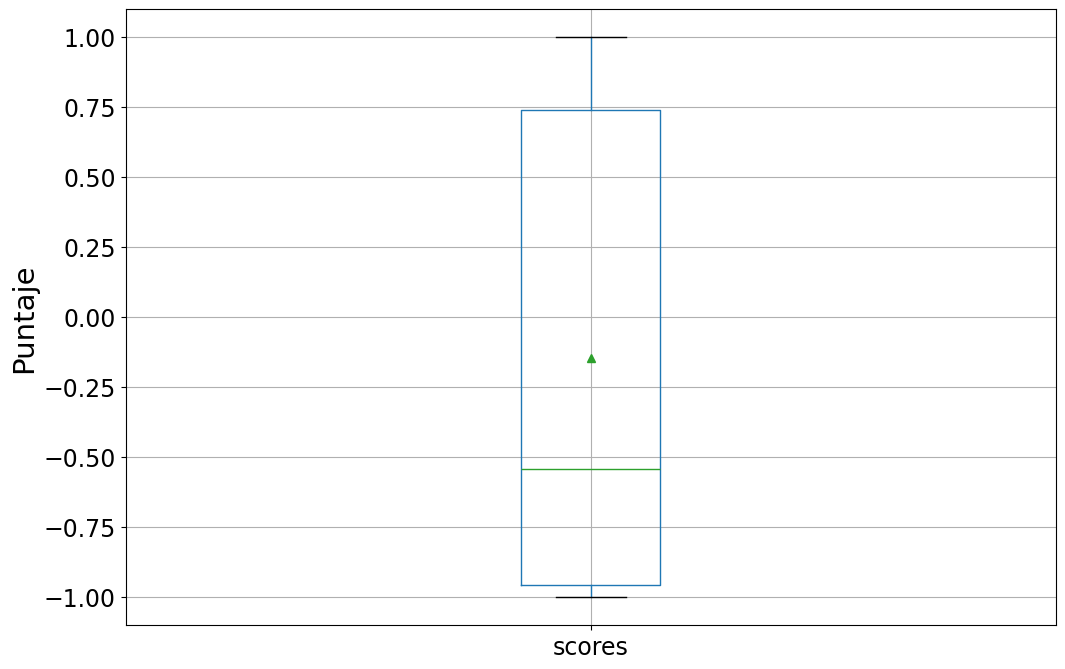

In [ ]:
# Se dibuja el boxplot resultante con los scores obtenidos
df_model_sent.boxplot(column='scores', figsize=(12, 8), showmeans=True, showfliers=False)
plt.ylabel('Puntaje', fontsize=21)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# Se muestra el boxplot
plt.show()

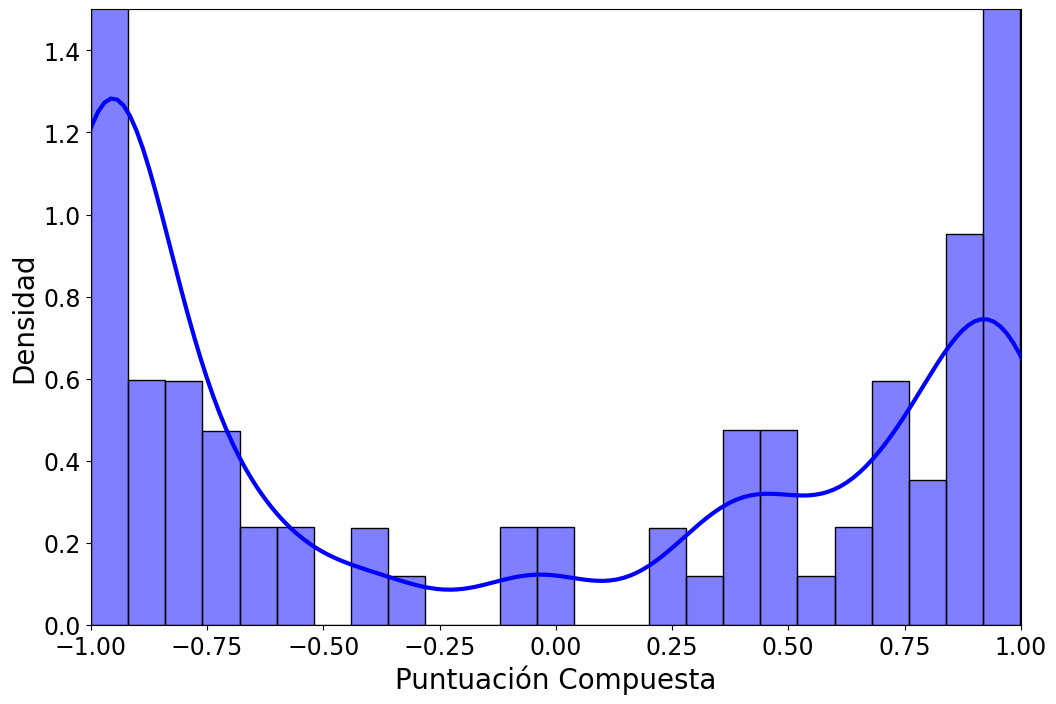

In [ ]:
# Se dibuja el histograma y la curva de densidad de los scores obtenidos para visualizar la asimetría
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.histplot(df_model_sent['scores'], bins=25, kde=True, color="blue", stat="density")
ax = sns.kdeplot(df_model_sent['scores'], color='blue', linewidth=3)
plt.xlabel('Puntuación Compuesta', fontsize=20)
plt.ylabel('Densidad', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)

# Se ajusta del rango de los ejes
plt.xlim(-1, 1)
plt.ylim(0, 1.5)

plt.show()

In [ ]:
# Se carga el modelo entrenado anteriormente con los tópicos elegidos
lda_model = LdaModel.load("/content/model_4_topics.model")

In [ ]:
# Se filtran las columnas necesarias para hacer en Flourish una distribución de sentimientos por tópicos
data_to_save = df_model_sent[['scores', 'topic_dominant']]

In [ ]:
# A continuación se guardan las columnas filtradas en un archivo csv, especificando ',' como delimitador
# Para que al hacer la visualización de Flourish me quede el eje y con los tópicos establecidos se ajustan
topic_labels = {
    0: 'Tópico 1',
    1: 'Tópico 2',
    2: 'Tópico 3',
    3: 'Tópico 4'
}

# Reemplazar estos valores en la columna 'topic_dominant'
data_to_save['topic_dominant'] = data_to_save['topic_dominant'].map(topic_labels)

# Se guarda como CSV con coma como separador
data_to_save.to_csv('scores_and_topics.csv', index=False, sep=',')


<ipython-input-17-739052020>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_save['topic_dominant'] = data_to_save['topic_dominant'].map(topic_labels)


In [ ]:
# Se calculan estadísticas por tópico
stats_df = df_model_sent.groupby('topic_dominant')['scores'].describe().reset_index()
stats_df['IQR'] = stats_df['75%'] - stats_df['25%']  # los rango intercuartílicos
stats_df['Coef_Asimetría'] = df_model_sent.groupby('topic_dominant')['scores'].apply(pd.Series.skew).reset_index(drop=True)

In [ ]:
# Se imprimen las estadísticas obtenidas en el código para terminar de comentar el análisis de sentimientos en el documento
print(stats_df[['topic_dominant', 'max', 'min', 'mean', 'std', 'Coef_Asimetría']])

   topic_dominant     max     min      mean       std  Coef_Asimetría
0               0  0.9991 -0.9993 -0.149712  0.797199        0.283591
1               1  0.9905 -1.0000 -0.335582  0.864267        0.716988
2               2  0.9897 -0.9984 -0.154153  0.748437        0.151077
3               3  0.9993 -0.9999  0.005756  0.941026       -0.014935
